/tmp/ipykernel_240408/2520492127.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df['Name / Title'], weight='bold', fontsize=14)


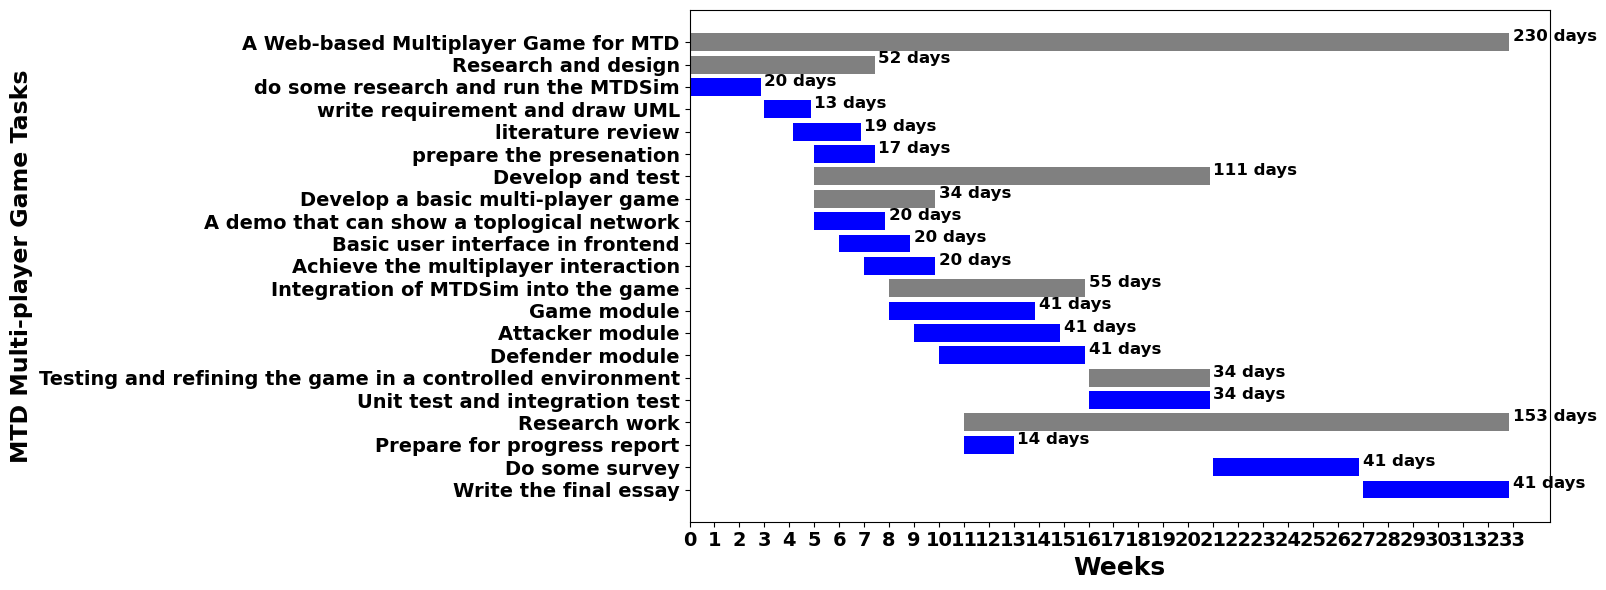

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('timeline.csv')

df = df.reindex(index=df.index[::-1])

# 将日期字符串转换为 datetime 类型
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# 计算任务开始和结束日期距离项目开始日期的天数
proj_start = df['Start Date'].min()
df['start_num'] = (df['Start Date'] - proj_start).dt.days
df['end_num'] = (df['End Date'] - proj_start).dt.days

# 计算每个任务的持续天数
df['days_start_to_end'] = df['end_num'] - df['start_num']

# 处理颜色列中的空值
default_color = 'gray'
df['Task Color'] = df['Task Color'].fillna(default_color)

# 将带有 "blue" 的颜色替换为 "blue"
df['Task Color'] = df['Task Color'].replace('.*blue.*', 'blue', regex=True)

# 将带有 "green" 的颜色替换为 "green"
df['Task Color'] = df['Task Color'].replace('.*green.*', 'green', regex=True)

# 创建画布
fig, ax = plt.subplots(1, figsize=(16, 6))

# 为每个任务绘制条形图
ax.barh(df['Name / Title'], df['days_start_to_end'], left=df['start_num'], color=df['Task Color'])

# 在条形图的末端添加持续天数标签
tasks = zip(df['days_start_to_end'], df['end_num'])
for w, (i, v) in enumerate(tasks):
    ax.text(v + 1, w + .05, str(i) + ' days', color='black', fontweight='bold', fontsize=12)

# 设置 x 轴的刻度和标签
xticks = np.arange(0, (df['end_num'].max() + 7), step=7)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks // 7, weight='bold', fontsize=14)

# 设置 y 轴的刻度和标签
ax.set_yticklabels(df['Name / Title'], weight='bold', fontsize=14)

# 设置 x 轴和 y 轴的标签
plt.xlabel('Weeks', weight='bold', fontsize=18)
plt.ylabel('MTD Multi-player Game Tasks', weight='bold', fontsize=17)

# 调整布局并显示图表
fig.tight_layout()
plt.savefig('gantt_chart.png', dpi=300, bbox_inches='tight')
plt.show()




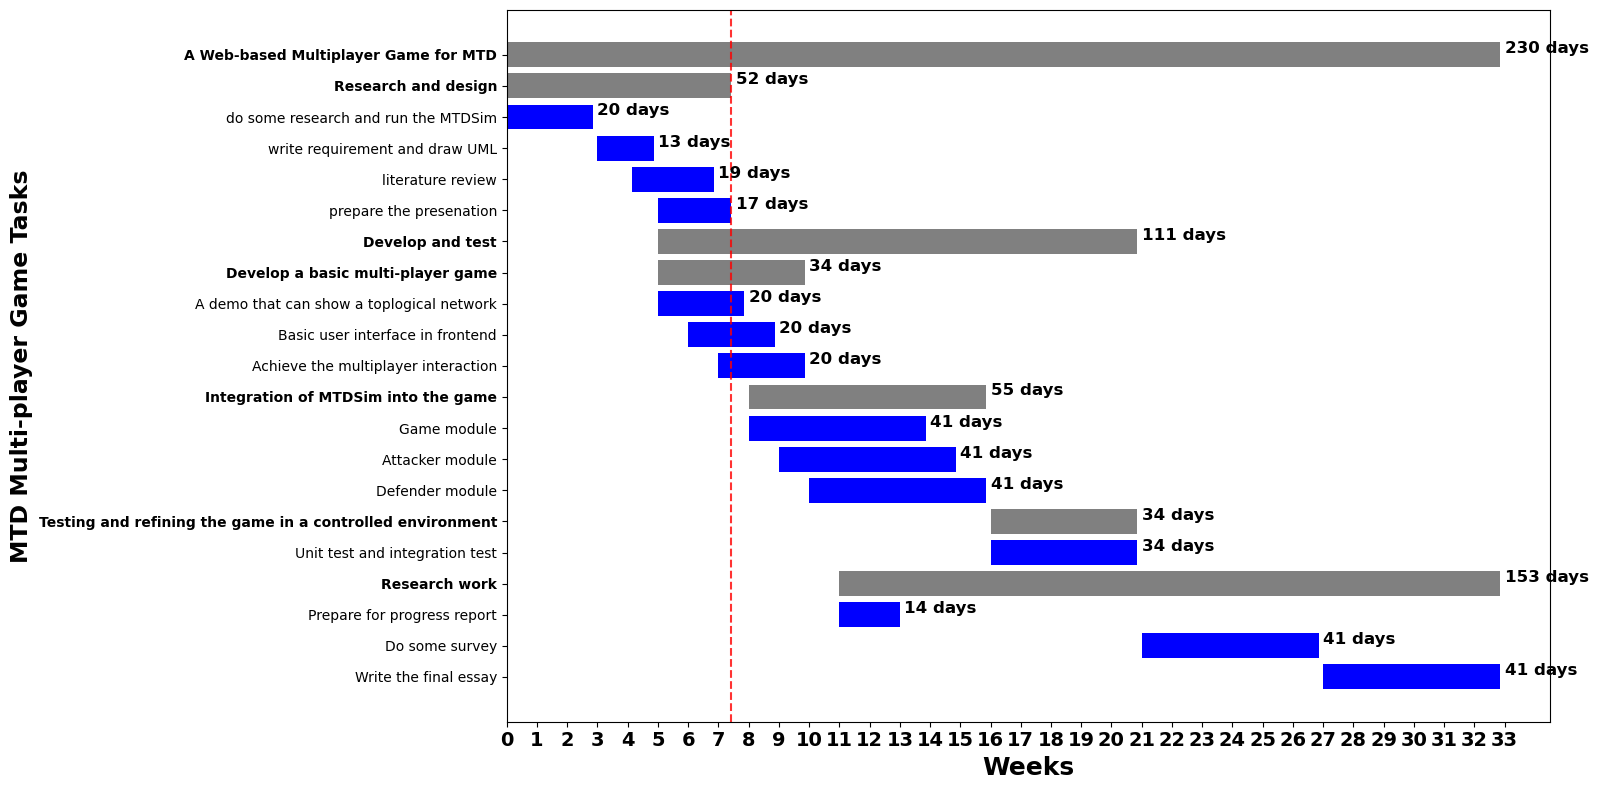

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('timeline.csv')

df = df.reindex(index=df.index[::-1])

# 将日期字符串转换为 datetime 类型
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# 计算任务开始和结束日期距离项目开始日期的天数
proj_start = df['Start Date'].min()
df['start_num'] = (df['Start Date'] - proj_start).dt.days
df['end_num'] = (df['End Date'] - proj_start).dt.days

# 计算每个任务的持续天数
df['days_start_to_end'] = df['end_num'] - df['start_num']

# 处理颜色列中的空值
default_color = 'gray'
df['Task Color'] = df['Task Color'].fillna(default_color)

# 将带有 "blue" 的颜色替换为 "blue"
df['Task Color'] = df['Task Color'].replace('.*blue.*', 'blue', regex=True)

# 将带有 "green" 的颜色替换为 "green"
df['Task Color'] = df['Task Color'].replace('.*green.*', 'green', regex=True)

# 创建画布
fig, ax = plt.subplots(1, figsize=(16, 8))

# 为每个任务绘制条形图
ax.barh(df['Name / Title'], df['days_start_to_end'], left=df['start_num'], color=df['Task Color'])

# 在条形图的末端添加持续天数标签
tasks = zip(df['days_start_to_end'], df['end_num'])
for w, (i, v) in enumerate(tasks):
    ax.text(v + 1, w + .05, str(i) + ' days', color='black', fontweight='bold', fontsize=12)

# 设置 x 轴的刻度和标签
xticks = np.arange(0, (df['end_num'].max() + 7), step=7)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks // 7, weight='bold', fontsize=14)

# 设置 y 轴的刻度和标签
yticks = ax.get_yticks()
for index, label in enumerate(ax.get_yticklabels()):
    if df['Task Color'].iloc[index] == 'gray':
        label.set_weight('bold')
    else:
        label.set_weight('normal')

# 设置 x 轴和 y 轴的标签
plt.xlabel('Weeks', weight='bold', fontsize=18)
plt.ylabel('MTD Multi-player Game Tasks', weight='bold', fontsize=17)

# 在当前日期处添加一条红色的虚线
today = pd.to_datetime('2023-04-21')
today_num = (today - proj_start).days
ax.axvline(today_num, linestyle='--', color='red', alpha=0.8)

# 调整布局并显示图表
fig.tight_layout()
plt.savefig('gantt_chart.png', dpi=300, bbox_inches='tight')
plt.show()
